# Lab 09 - Frequent Patterns

Name: Kartikeya Sharma  
Class: CSCI 349 - Intro to Data Mining  
Semester: 2021SP  
Instructor: Brian King  

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# own imports; using OHE instead of pd.get_dummies()
from sklearn.preprocessing import OneHotEncoder

#### 1) [P] Add the import statements:<br/><br/>```from mlxtend.preprocessing import TransactionEncoder```<br/><br/>```from mlxtend.frequent_patterns import apriori, association_rules```<br/><br/>These first exercises are going to allow you to leverage the actual documentation from the mlxtend user guide online. Even though the first few of these are copied from their docs, it's good for you to have these examples in one place. The second part of this lab will use a much more extensive transaction dataset.

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

#### 2) [P] Go to the page: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/ . Enter the list ```dataset``` shown on the page. Then, copy the example code that transforms the list to a numpy encoded array, then to a pandas ```DataFrame``` with the correct column names. Output your data frame. It should look identical to:<br/><br/>*output below matches output in assignment*

In [4]:
# dataset
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

# example code: transforms list to numpy encoded array and 
# then to DF with cols 
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


#### 3) [P] Show the result of describe() and info() on your dataframe.

In [5]:
df.describe()

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
count,5,5,5,5,5,5,5,5,5,5,5
unique,2,2,2,2,2,1,2,2,2,2,2
top,False,False,False,True,False,True,True,False,True,False,True
freq,4,3,4,4,4,5,3,3,3,4,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         5 non-null      bool 
 1   Corn          5 non-null      bool 
 2   Dill          5 non-null      bool 
 3   Eggs          5 non-null      bool 
 4   Ice cream     5 non-null      bool 
 5   Kidney Beans  5 non-null      bool 
 6   Milk          5 non-null      bool 
 7   Nutmeg        5 non-null      bool 
 8   Onion         5 non-null      bool 
 9   Unicorn       5 non-null      bool 
 10  Yogurt        5 non-null      bool 
dtypes: bool(11)
memory usage: 183.0 bytes


#### 4) [P] Following along the mlxtend user guide, use the apriori algorithm to final all frequent itemsets with a ```min_support``` of 0.6. Show the resulting dataframe, and store the result, since you'll have many selection exercises next. All selection exercises must be done from this resulting frame. Set ```use_colnames=True```. It'll be much easier to interpret your patterns.

In [7]:
# parameters
min_support=0.6

In [8]:
df_min_support = apriori(
    df, 
    min_support=min_support, 
    use_colnames=True
)

display(df_min_support)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


#### 5) [P] Select all frequent itemsets that have support => 0.8

In [9]:
df_min_support[df_min_support["support"] >= 0.8]

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
5,0.8,"(Eggs, Kidney Beans)"


#### 6) [P] Select all frequent itemsets with at least 2 items. In their documentation, they often create additional helper variables to make it easier to select your data. That's entirely up to you. (I tend to be a purist, and reserve additional variables for only very complex selection criteria. Computing the length of an itemset is not one of them! It's entirely up to you. Do what makes the most sense to you.)

In [10]:
df_min_support[
    df_min_support['itemsets'].apply(lambda x: len(x) >= 2)
]

,support,itemsets
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"
10,0.6,"(Eggs, Onion, Kidney Beans)"


#### 7) [P] Select the frequent itemsets that contain an ```'Onion'``` in the itemset.

In [11]:
df_min_support[
    df_min_support['itemsets'].apply(lambda x: "Onion" in x)
]

,support,itemsets
3,0.6,(Onion)
6,0.6,"(Eggs, Onion)"
8,0.6,"(Onion, Kidney Beans)"
10,0.6,"(Eggs, Onion, Kidney Beans)"


#### 8) [P] Select the frequent itemsets that contain both ```'Onion'``` and ```'Eggs'``` in the itemset. (HINT: You should have 2 frequent itemsets selected. And, if you haven't learned about the set type in Python and all of the standard set operations, they can really make these types of questions much easier.)

In [12]:
df_min_support[
    df_min_support['itemsets'].apply(
        lambda x: set(x).issuperset({"Onion", "Eggs"})
    )
]

,support,itemsets
6,0.6,"(Eggs, Onion)"
10,0.6,"(Eggs, Onion, Kidney Beans)"


#### 9) [P] Select the frequent itemsets that contain either an ```'Onion'``` or ```'Kidney Beans'``` (or both) in the itemset. (HINT: You should have 8 frequent itemsets output.)

In [13]:
df_min_support[
    df_min_support['itemsets'].apply(
        lambda x: not set(x).isdisjoint({"Onion", "Kidney Beans"})
    )
]

,support,itemsets
1,1.0,(Kidney Beans)
3,0.6,(Onion)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"
10,0.6,"(Eggs, Onion, Kidney Beans)"


#### 10) [P] http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/ contains the all the information and guidance you need for working with association rules from frequent patterns. (NOTE – they mention a function called ```generate_rules()```. The function is ```association_rules()```.) Generate rules with a minimum confidence of 0.7. Store your resulting data frame called ```rules```. Show the entire data frame. (You should have 12 rules).

In [14]:
rules = association_rules(
    df_min_support, 
    metric="confidence", 
    min_threshold=0.7)
display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
9,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf


#### 11) [P] Output the top 5 rules in descending order by "lift", with the secondary sort key by "confidence".

In [15]:
rules.sort_values(
    by=["lift", "confidence"], 
    ascending=False
).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
9,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
11,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf
2,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
8,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


#### 12) [P] Select all rules that have a 1.0 support for the antecedent.

In [16]:
association_rules(
    df_min_support, 
    metric="antecedent support", 
    min_threshold=1.0)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.0,0.0,1.0
1,(Kidney Beans),(Milk),1.0,0.6,0.6,0.6,1.0,0.0,1.0
2,(Kidney Beans),(Onion),1.0,0.6,0.6,0.6,1.0,0.0,1.0
3,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.6,1.0,0.0,1.0
4,(Kidney Beans),"(Eggs, Onion)",1.0,0.6,0.6,0.6,1.0,0.0,1.0


#### 13) [P] Select all rules that have at least 3 or more items represented in the rule (i.e. the union of the antecedent and consequent >= 3.)

In [17]:
all_association_rules = association_rules(df_min_support, 
                                          metric="support",
                                          min_threshold=0)

In [18]:
all_association_rules[all_association_rules.apply(
    lambda x: len(
        set(x["antecedents"]).union(set(x["consequents"])) 
    ) >= 3,
    axis=1
)]                  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
11,"(Eggs, Kidney Beans)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
12,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
13,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6
14,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.00,1.25,0.12,inf
15,(Kidney Beans),"(Eggs, Onion)",1.0,0.6,0.6,0.60,1.00,0.00,1.0


#### 14) [P] Select the rules that have confidence >= 0.75 and a lift > 1

In [19]:
all_association_rules[
    (all_association_rules["confidence"] >= 0.75) &
    (all_association_rules["lift"] > 1)
]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
12,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
14,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


# Chipotle Data

#### 15) [P] Read in the Chipotle dataset:<br/><br/>```url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'```<br/><br/>```df_chip = pd.read_csv(url, sep = '\t')```

In [20]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df_chip = pd.read_csv(url, sep = '\t')

#### 16) [P] Show the result of ```df_chip.info(verbose=True)``` You should have five variables.

In [21]:
df_chip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


#### 17) [P] Show the result of ```describe(include='all')```

In [22]:
df_chip.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


#### 18) [P] Show the first 10 observations

In [23]:
df_chip.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### 19) [M] Study what you see so far. Minimally, you should notice that you have three variables that need to be transformed into usable types. Which ones, and what do you need to do with them?

The three variables that need to be transformed into usable types are: item_name, choice_description, item_price. Item_name needs to be changed into a categorical, where each category represents a type of item, such as a chicken bowl, a side of chips, etc. Then, each entry in the choice_description column needs to be changed into a set of strings, where each string in the set represents a choice/add-on that is added to the item. Finally, item_price needs to be changed into a float, so it can be analyzed like a numeric variable.

#### 20) [P] Let's start doing some preprocessing. Convert the ```item_price``` field to a floating-point number, and then show the result of ```df_chip.item_price.describe()``` to show that it is indeed a numeric variable now.

In [24]:
df_chip.item_price = df_chip.item_price.replace('[\$,]', '', regex=True).astype(float)
df_chip.item_price.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

#### 21) [P] Now, convert the ```item_name``` to a categorical variable.

In [25]:
df_chip.item_name = pd.Categorical(df_chip.item_name)
# df_chip.item_name.dtype # to verify

#### 22) [P] How many unique ```item_name``` values are there?

In [26]:
df_chip.item_name.describe()["unique"]

50

#### 23) [P] Show all of the unique values in ```item_name```. Do you see any potential problems? (Leave them! Don't fix them. Just pay close attention. Need a hint? Salsa)

In [27]:
df_chip.item_name.cat.categories

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

The potential problems here are that the following item names have duplicates: "Chips and Roasted Chili(-)Corn Salsa," "Chips and Tomatillo(-)Green Chili Salsa," and "Chips and Tomatillo(-)Red Chili Salsa"; each of those items has a string in the unique list with a hyphen and one in that list without a hyphen.

#### 24) [P] How many distinct orders are there?

In [28]:
# assumption: one order ID corresponds to one order
len(df_chip.order_id.unique())

1834

#### 25) [PM] Show a boxplot of the number of line items per order. Do NOT consider the quantity of each item, just the total count of line items. (NOTE: Many items appear multiple times in an order. Don't worry about that. Just count the number of items per order.) Then, comment on the distribution of the total number of items per order.<br/><br/>Your boxplot should look something like this: *output resembles that given in the assignment*

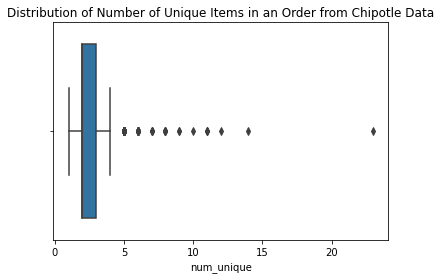

In [29]:
# easier to view on horizontal axis, so I made the box plot span horizontally (even though example
# shows vertical spanning of box plot...)
ax = sns.boxplot(x=df_chip.order_id.value_counts())
ax.set_xlabel("num_unique")
ax.set_title("Distribution of Number of Unique Items in an Order from Chipotle Data");

In [30]:
df_chip.order_id.value_counts().describe()

count    1834.000000
mean        2.520174
std         1.200508
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        23.000000
Name: order_id, dtype: float64

In [31]:
print("Outliers <order number, # line item>:")
df_chip.order_id.value_counts()[
    df_chip.order_id.value_counts() > df_chip.order_id.value_counts().describe()["75%"] + \
    1.5*(df_chip.order_id.value_counts().describe()["75%"] - df_chip.order_id.value_counts().describe()["25%"])
] # no outliers below the 25%ile, as shown both on the box plot above and verified using mental math and
  # the statistics provided in describe(), i.e. 2-1.5(1) = 0.5, which is impossible because the min is 1 for
  # there to be an order; even if there were, we would discard it as erroneous data

Outliers <order number, # line item>:


926     23
1483    14
205     12
1786    11
759     11
        ..
654      5
1679     5
215      5
225      5
1827     5
Name: order_id, Length: 76, dtype: int64

We should begin my noting that this distribution only has positive integer number of items, this makes sense because the distribution counts the number of (line) items attributable to a particular order. The boxplot, as a visualization, can be quite deceiving when trying to figure out the number of outliers; it appears that there are only ten outliers from the figure. Having duplicate counts in the distribution makes sense because the range is on the order of 10 total number of orders is on the orders of thousands (and, we must remember that there are only a discrete amount of values that can be taken on within that range). In actuality, there are 76 outliers; the calculation is done above. Because of the nature of the outliers and distribution shown by the box plot, this distribution is rightly skewed (the mean is raised by the high line-item orders, that is, above the median).

Typically (using median rather than mean, which is skewed by the high outliers), an order with two (line) items was placed, the upper 75% of orders had at least two (line) items, the higher 25% of orders had three (line) items, and the maximum number of (line) items in an order was 23 (and, of course, the minimum number of (line) items in an order was 1).

#### 26) [P] Show a boxplot of the TOTAL number of items per order. Now, you must consider the quantity of each item in each order. (The box plot will be similar to the previous, with the exception that there will be more outliers, and the maximum outlier will be 35.)

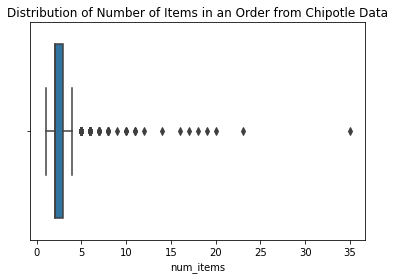

In [32]:
tot_num_items = df_chip.groupby("order_id").apply(lambda x: x["quantity"].sum())

# easier to view on horizontal axis, so I made the box plot span horizontally (even though example
# shows vertical spanning of box plot...)
ax = sns.boxplot(x=tot_num_items)
ax.set_xlabel("num_items")
ax.set_title("Distribution of Number of Items in an Order from Chipotle Data");

In [33]:
# let's verify that the max outlier is 35
tot_num_items.max()

35

#### 27) [P] What were the top 5 ordered items by total quantity? Report the item and its total quantity ordered. Be sure to consider the quantity of each item ordered!

In [34]:
top_five_items = df_chip.groupby("item_name")["quantity"].sum().nlargest(5)
display(top_five_items)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

In [35]:
print("The top five items are:")
top_five_items.index.tolist()

The top five items are:


['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink']

#### 28) [P] What is the total number of ```"Steak Burrito"``` ordered?

In [36]:
df_chip[df_chip.item_name=="Steak Burrito"]["quantity"].sum()

386

#### 29) [P] What is mean price for an order (NOTE – This is NOT just a mean of the ```item_price``` column!)

In [37]:
# approximate (rounded to 2 decimal places)
print(
    "~$" + str(round(df_chip.groupby("order_id").item_price.sum().mean(),2))
)

~$18.81


#### 30) [P] What was total revenue for the day?

In [38]:
print("$" + str(df_chip.item_price.sum()))

$34500.16


#### 31) [P] What was the largest total price for a single order? Show the order number and the total price.

In [39]:
# order number is the index of the series generated by sum() on the caller
order_num_max_tot_price = df_chip.groupby("order_id").item_price.sum().idxmax()
print("order number: " + str(order_num_max_tot_price))
print("$" + 
      str(df_chip.groupby("order_id").item_price.sum()[order_num_max_tot_price])
     )

order number: 926
$205.25


#### 32) [P] Show the entire order to your answer to the previous question<br/><br/>(NOTE: This should show you how some orders can contain multiple lines of the same item. Not uncommon!)

In [40]:
df_chip.groupby("order_id").get_group(order_num_max_tot_price)

,order_id,quantity,item_name,choice_description,item_price
2304,926,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuce]]",9.25
2305,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2306,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2307,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2308,926,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Lettu...",9.25
2309,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2310,926,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour...",9.25
2311,926,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2312,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce]]",8.75
2313,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",8.75


#### 33) [P] What order had the largest total quantity of items purchased? Show the order number and the total number of items

In [41]:
# order number is the index of the series generated by sum() on the caller
order_num_max_tot_num_items = df_chip.groupby("order_id").quantity.sum().idxmax()
print("order number: " + str(order_num_max_tot_num_items))
print("quantity: " + \
      str(df_chip.groupby("order_id").quantity.sum()[order_num_max_tot_num_items]))

order number: 1443
quantity: 35


#### 34) [P] Show the entire order to your answer to the previous question

In [42]:
df_chip.groupby("order_id").get_group(order_num_max_tot_num_items)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3599,1443,7,Bottled Water,NaN,10.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75
3604,1443,2,Bottled Water,NaN,3.00


#### 35) [P] Recall that this dataset is a set of transactions, where each observation represents one item purchased as part of an ```order_id```. However, the data are not read in this way. You need to transform this dataset to a collection of binary encoded transactions, where each row represents ONE transaction, and the columns are binary encoded variables, with each variable representing ONE item available for purchase at Chipotle. Convert your data. Your resulting data frame should have an index representing the ```order_id```, and columns representing each possible item from the ```item_name``` variable. For now, a transaction will ignore the quantity of item purchased.

In [43]:
df_chip_item_binarized = \
pd.get_dummies(
    df_chip[["order_id", "item_name"]], 
    columns=["item_name"], 
    prefix="", 
    prefix_sep="").groupby("order_id", as_index=False).any()
df_chip_item_binarized.index = df_chip_item_binarized["order_id"]
df_chip_item_binarized.drop(labels="order_id", axis=1, inplace=True)
display(df_chip_item_binarized.shape) # verifying shape 

(1834, 50)

#### 36) [P] Show the first 10 observations from your transaction data

In [44]:
df_chip_item_binarized.head(10)

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#### 37) [P] Too often, many start by considering a minimum support that is arbitrarily large. Go ahead and use the apriori method to generate frequent itemsets with a minsup value of 0.5. What happened?

In [45]:
apriori(df_chip_item_binarized, min_support=0.5)

,support,itemsets


There were no frequent itemsets with a minimum support value of 0.5. This can be explained by, as the problem suggests, the fact that an arbitrarily large minimum support value was chosen.

#### 38) [P] Take a step back. Your previous outcome is why you ALWAYS perform essential EDA tasks before you dive into mining a dataset! Report a table that shows the number of transactions each item occurred in, sorted in order of most frequent to least. NOTE: That number essentially represents the absolute support for 1-itemsets! So, include a column that shows the relative support (i.e. the fraction of total transactions.)<br/><br/>(HINT: The item with the highest support is 33.5%!)

In [46]:
df_num_transactions_by_item = \
pd.DataFrame(df_chip_item_binarized.sum(axis=0).sort_values(ascending=False))
df_num_transactions_by_item["relative_support"] = \
df_num_transactions_by_item / len(df_chip_item_binarized.index)
df_num_transactions_by_item.rename(columns={0: "frequency"}, inplace=True)
display(df_num_transactions_by_item.head()) # verifying output

,frequency,relative_support
Chicken Bowl,615,0.335333
Chicken Burrito,489,0.266630
Chips and Guacamole,474,0.258451
Steak Burrito,342,0.186478
Canned Soft Drink,276,0.150491


#### 39) [P] Now, make a smarter decision. Like many large, real-world transaction datasets, data is sparse! You have many variables, and most observations use only a handful of them. This is the definition of a sparse dataset. You need a better minsup value. Regenerate frequent itemsets, but now use a minsup of 0.005. How many frequent itemsets were reported? Report your frequent items sorted by decreasing support order.

In [47]:
apriori(df_chip_item_binarized, min_support=0.005, use_colnames=True)\
.sort_values(by=["support"], ascending=False)

,support,itemsets
11,0.335333,(Chicken Bowl)
12,0.266630,(Chicken Burrito)
18,0.258451,(Chips and Guacamole)
29,0.186478,(Steak Burrito)
7,0.150491,(Canned Soft Drink)
...,...,...
109,0.005453,"(Chips and Guacamole, Chicken Crispy Tacos)"
132,0.005453,"(Steak Burrito, Steak Soft Tacos)"
131,0.005453,"(Steak Bowl, Veggie Bowl)"
112,0.005453,"(Steak Bowl, Chicken Salad Bowl)"


146 frequent items were reported (with a minimum support value of 0.005).

#### 40) [M] In the context of association rules, explain the difference between support, confidence, lift, leverage and conviction.

Given I and J being disjoint itemsets, I -> J is an association rule, where I is the antecedent (itemset) and J is the consequent (itemset). Support for an association rule is essentially the support of the union itemset containing the two itemsets I and J contained within the association rule. The support metric itself is directly associated with a particular itemset, which, in this case, is the union itemset of the two itemsets specified within the association rule. The support metric essentially represents the fraction of transactions in the dataset that contain an itemset. 

Confidence provides a probability that both I and J will be in a transaction if I is in a transaction using the support values for union of I and J and for I. It doesn't just say whether or not the union itemset is popular amongst transaction but rather what is the strength of the association (probability that it will be spot-on if used as a prediction) that if I is found in a transaction (out of all the transactions that I is in) then J will also be found.

Lift highlights the dependence of I and J on one another by showing "how far" from independence it is. It uses the frequency of the union itemset (actual) vs. the product of the frequency of I and frequency of J (theoretical: independent probability).

Leverage, instead of showing what factor more frequently does the union of the itemset occur rather than independent chances of I and J like lift does, shows how much more frequently the union itemset occurs than if I and J are independent.

Conviction essentially demonstrates how many times more frequently does the consequent J not appear across all the transactions compared to across all of the transactions with the antecedent I. For instance, a conviction of 1.50 would mean that predicting J independent of X (across all transactions) yields incorrect predictions 50% more often than if predicted given I (transactions with I). It is similar to lift, though, in that a value of 1 signifies independence of I and J.


Sources:
    1. http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
    2. https://en.wikipedia.org/wiki/Association_rule_learning

#### 41) [P] Generate all association rules that meet a minimum support of 0.01. How many rules were output in total?

In [48]:
df_chip_item_all_itemsets = apriori(
    df_chip_item_binarized, min_support=0.01, use_colnames=True
).sort_values(by=["support"], ascending=False) # smallest possible min support value

In [49]:
association_rules_min_sup = association_rules(df_chip_item_all_itemsets, 
                                          metric="support",
                                          min_threshold=0.01)
display(association_rules_min_sup)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653
1,(Chips and Guacamole),(Chicken Bowl),0.258451,0.335333,0.081243,0.314346,0.937416,-0.005424,0.969392
2,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985
3,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568
4,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979
...,...,...,...,...,...,...,...,...,...
103,(Chicken Salad Bowl),(Chips and Guacamole),0.053435,0.258451,0.010360,0.193878,0.750151,-0.003451,0.919896
104,(6 Pack Soft Drink),(Chicken Burrito),0.029444,0.266630,0.010360,0.351852,1.319624,0.002509,1.131485
105,(Chicken Burrito),(6 Pack Soft Drink),0.266630,0.029444,0.010360,0.038855,1.319624,0.002509,1.009791
106,(Bottled Water),(Chips and Guacamole),0.083969,0.258451,0.010360,0.123377,0.477369,-0.011342,0.845915


108 rules were in the output total.

#### 42) [P] Show only the rules that have a lift > 2, but sorted in order of decreasing confidence. What is your strongest rule?

In [50]:
# TL;DR just showing my work here; please feel free to ignore this cell if needed

# all_association_rules = association_rules(df_chip_item_all_itemsets, 
#                                           metric="support",
#                                           min_threshold=np.nextafter(0, 1))

# 38496 data points... with a lot of junk; trying again in next cell
# all_association_rules[
#     all_association_rules["lift"] > 2
# ].sort_values(by=["confidence"], ascending=False)

In [51]:
association_rules_min_sup[
    association_rules_min_sup["lift"] > 2
].sort_values(by=["confidence"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,"(Bottled Water, Chips)",(Chicken Bowl),0.019084,0.335333,0.015267,0.800000,2.385691,0.008868,3.323337
52,"(Bottled Water, Chicken Bowl)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.011000,1.492061
26,(Canned Soda),(Steak Burrito),0.051254,0.186478,0.019629,0.382979,2.053751,0.010071,1.318467
28,"(Chicken Bowl, Canned Soft Drink)",(Chips),0.060523,0.113413,0.019084,0.315315,2.780232,0.012220,1.294883
54,"(Chicken Bowl, Chips)",(Bottled Water),0.066521,0.083969,0.015267,0.229508,2.733234,0.009681,1.188891
34,(Bottled Water),(Chips),0.083969,0.113413,0.019084,0.227273,2.003934,0.009561,1.147347
55,(Bottled Water),"(Chicken Bowl, Chips)",0.083969,0.066521,0.015267,0.181818,2.733234,0.009681,1.140918
33,(Chips),"(Chicken Bowl, Canned Soft Drink)",0.113413,0.060523,0.019084,0.168269,2.780232,0.012220,1.129544
35,(Chips),(Bottled Water),0.113413,0.083969,0.019084,0.168269,2.003934,0.009561,1.101355
57,(Chips),"(Bottled Water, Chicken Bowl)",0.113413,0.037623,0.015267,0.134615,3.578038,0.011000,1.112080


The strongest rule is {Chips, Bottled Water} -> {Chicken Bowl}.

In [52]:
association_rules_min_sup[
    association_rules_min_sup["lift"] > 2
].sort_values(by=["confidence"], ascending=False).head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,"(Bottled Water, Chips)",(Chicken Bowl),0.019084,0.335333,0.015267,0.8,2.385691,0.008868,3.323337


The strongest rule is shown in the output above.

#### 43) [M] Consider yourself the data scientist hired to help Chipotle understand item purchasing patterns. Interpret the following rule for the non data scientist. Be careful not to say, "if your customers purchase bottled water and chips, they are also going to buy chicken bowls." Think! What do strong association rules convey?<br/><br/>*output in assignment is similar to the output above*

Strong association rules convey the relatively high **likelihood** of the occurence if a particular antecedent is found in a transaction, the consequent is found in a transaction. Another way of describing what strong association rules convey, in the context of market basket analysis, is how likely are people who buy the antecedent to also buy the consequent. About 1.9 percent of transactions in the data set contain the antecedent {Chips, Bottled Water} (antecedent support metric, about 33.5 percent for the consequent {Chicken Bowl} (consequent support metric), and 1.5 percent for all the union of those two sets (support metric), namely the antecedent and the consequent. Also, if a transaction contains the antecedent {Chips, Bottled Water}, then there is about a **80% probability** (confidence metric) that the transaction will also contain the consequent {Chicken Bowl}. In another words, there is a 80% probability that a person that buys {Chips, Bottled Water} will also buy {Chicken Bowl}. The union of the antecedent and consequent in a transaction occurs about 2.39 times more frequently in the data set than if they were purely independent (lift metric). The antecedent {Chips, Bottled Water} and consequent {Chicken Bowl} occur about 0.89% more frequently (leverage metric) in the data set across the transactions than if they were truly indepdendent (antecedent and consequent would be in the same data set by, with respect to one another, random chance). The probability that a transaction does not have the consequent {Chicken Bowl} across all of the transactions is 3.32 times the probability that a transaction does not have the consequent {Chicken Bowl} across all of the transactions that have the antecedent {Chips, Bottled Water}.

#### 44) [P] Suppose your boss is interested in what items are most likely related to a purchase of ```"Chips and Guacamole"```. Using your rule set generated, first select the rules that have ```"Chips and Guacamole"``` listed in the consequent itemset. Sort the rules by confidence, then by lift. And interpret your findings. Identify the item(s) that are the most suggestive of including ```"Chips and Guacamole"``` when purchased, and state why.

In [53]:
association_rules_min_sup[
    association_rules_min_sup["consequents"] == \
    {"Chips and Guacamole"}
].sort_values(by=["confidence", "lift"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
96,(6 Pack Soft Drink),(Chips and Guacamole),0.029444,0.258451,0.011450,0.388889,1.504688,0.003841,1.213443
40,(Veggie Burrito),(Chips and Guacamole),0.049618,0.258451,0.016903,0.340659,1.318079,0.004079,1.124682
63,(Veggie Bowl),(Chips and Guacamole),0.044711,0.258451,0.014722,0.329268,1.274004,0.003166,1.105581
39,(Chicken Soft Tacos),(Chips and Guacamole),0.058342,0.258451,0.017448,0.299065,1.157143,0.002370,1.057943
23,(Steak Bowl),(Chips and Guacamole),0.102508,0.258451,0.028899,0.281915,1.090785,0.002405,1.032675
89,(Barbacoa Burrito),(Chips and Guacamole),0.047983,0.258451,0.011996,0.250000,0.967300,-0.000406,0.988731
0,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653
4,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979
19,(Canned Soft Drink),(Chips and Guacamole),0.150491,0.258451,0.033806,0.224638,0.869168,-0.005089,0.956390
8,(Steak Burrito),(Chips and Guacamole),0.186478,0.258451,0.041439,0.222222,0.859822,-0.006756,0.953420


The items that are most suggestive of including Chips and Guacamole when purchased are a 6 Pack Soft Drink, Veggie Burrito, Veggie Bowl, Chicken Soft Tacos, and then Steak Bowl (in decending confidence metric and descending lift metric order both). Chips and Guacamole are more likely to be found in items with these orders then across all of the orders (about the following times, respectively, 1.50, 1.32, 1.27, 1.16, and 1.09). The lift metric, compared to the confidence metric, better captures whether the antecedent and consequent have some level of dependence (confidence, i.e. dependent on antecedent/across transactions with antecedent, > consequent support, i.e. independent/across whole data set) or can rather be classified as being independent to one another. Their leverage values suggest that there is a more frequent occurrence of the consequent when looking across transactions with the antecedent than when looking across all of the transactions in the data set (>0). The conviction values are > 1 for those items, which means that it is more likely for the consequent to not be in a transaction across all of the transactions than transactions with the antecedent. The support metric just informs us that each of the 'most likely related' items aforementioned and {Chips and Guacamole} are only in about 1-3% of all of the transactions; that being said, this does not necessarily take away from the strength of the association rules being established here. Finally, there should be a minimum lift, leverage, and/or conviction threshold that should be passed for an association rule to be considered strong rather than appearing marginally dependent by random chance.

#### 45) [P] These data suggest that the ```"Chicken Bowl"``` is the single most frequent item purchased for this particular location. Great. Let's dive into those chicken bowls more. If you have ever been to Chipotle, you know that they are great about letting you customize your items. That's what the ```choice_description``` field is for.<br/><br/>Process all of the items listed in the ```"choice_description"``` field by creating a new transaction dataset representing binary encoded transaction data for only Chicken Bowls. Note – this is tricky because the ```choice_description``` variable is read in as a long string. The string itself represents a list, and quite often, it's a list of lists. You need to process this field to be an actual *flattened* list of items. Then, you can easily convert these to transactions. This page will give you an idea on how to do it. https://chrisalbon.com/python/data_wrangling/pandas_expand_cells_containing_lists/ . Remember, many of these lists contain lists themselves! You may need to just write a python function that takes in a list of lists, and returns a single list of all of the items flattened out. Then, apply that function.

In [54]:
def flatten_list(s: str):
    s = s.replace("[", "")
    s = s.replace("]", "")
    l = s.split(", ")
    for i in range(len(l)):
        l[i] = l[i].strip()
        l[i] = " ".join(l[i].split())
    return l

In [55]:
# from earlier in the lab, it was mentioned that one
# transaction was a complete order (all line items with a
# particular order_id value). however, because this problem
# mentions "for only Chicken Bowls," I will treat each Chicken
# Bowl item as a separate transaction
df_chip_chckn_bwl_choice_desc = df_chip.loc[
    df_chip["item_name"]=="Chicken Bowl", 
    "choice_description"
].copy(deep=True)

df_chip_chckn_bwl_choice_desc = \
df_chip_chckn_bwl_choice_desc.apply(flatten_list)

df_chip_chckn_bwl_choice_desc = \
df_chip_chckn_bwl_choice_desc.apply(pd.Series)

df_chip_chckn_bwl_choice_desc

,0,1,2,3,4,5,6,7,8
4,Tomatillo-Red Chili Salsa (Hot),Black Beans,Rice,Cheese,Sour Cream,NaN,NaN,NaN,NaN
5,Fresh Tomato Salsa (Mild),Rice,Cheese,Sour Cream,Guacamole,Lettuce,NaN,NaN,NaN
13,Fresh Tomato Salsa,Fajita Vegetables,Rice,Cheese,Sour Cream,Guacamole,NaN,NaN,NaN
19,Tomatillo Red Chili Salsa,Fajita Vegetables,Black Beans,Sour Cream,Cheese,Lettuce,NaN,NaN,NaN
26,Roasted Chili Corn Salsa (Medium),Pinto Beans,Rice,Fajita Veggies,Cheese,Sour Cream,Lettuce,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4590,Roasted Chili Corn Salsa,Rice,Black Beans,Cheese,Lettuce,Guacamole,NaN,NaN,NaN
4591,Tomatillo Red Chili Salsa,Rice,Black Beans,Sour Cream,Cheese,Lettuce,NaN,NaN,NaN
4595,Tomatillo Green Chili Salsa,Rice,Black Beans,NaN,NaN,NaN,NaN,NaN,NaN
4599,Roasted Chili Corn Salsa,Cheese,Lettuce,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
def custom_binarizer(df: pd.DataFrame):
    column_names = df.stack().unique()
    df_binarized = pd.DataFrame(
        np.zeros((len(df.index), len(column_names))),
        index=df.index,
        columns=column_names
    )
    for index, row in df.iterrows():
        for column in df.columns:
            if row.loc[column] != np.nan:
                df_binarized.loc[index,row.loc[column]] = 1
    
    df_binarized = df_binarized.drop(np.nan, axis=1)
    
    return df_binarized



In [57]:
df_chip_chckn_bwl_choice_desc_binarized = \
custom_binarizer(df_chip_chckn_bwl_choice_desc)
                 
display(df_chip_chckn_bwl_choice_desc_binarized) # verifying output

,Tomatillo-Red Chili Salsa (Hot),Black Beans,Rice,Cheese,Sour Cream,Fresh Tomato Salsa (Mild),Guacamole,Lettuce,Fresh Tomato Salsa,Fajita Vegetables,Tomatillo Red Chili Salsa,Roasted Chili Corn Salsa (Medium),Pinto Beans,Fajita Veggies,Roasted Chili Corn Salsa,Tomatillo Green Chili Salsa,Tomatillo-Green Chili Salsa (Medium),Fresh Tomato (Mild),White Rice
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4591,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4599,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### 46) [P,M] Use your own knowledge to generate strong frequent patterns and association rules for the ```choice_description``` items used with Chicken Bowls. Explain your findings.

In [58]:
df_chip_chckn_bwl_itemsets = apriori(
    df_chip_chckn_bwl_choice_desc_binarized, 
    min_support=np.nextafter(0, 1), 
    use_colnames=True
).sort_values(
    by=["support"], 
    ascending=False
) # smallest possible min support value

assoc_rules_chckn_bwl = association_rules(
    df_chip_chckn_bwl_itemsets, 
    metric="support",
    min_threshold=0.01)

I will be conducting some exploratory data analysis below by briefly analyzing support, confidence, lift, leverage, and conviction. I have left the output of the cells below to show my work and thought process. 

In [59]:
assoc_rules_chckn_bwl.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,24060.000000,24060.000000,24060.000000,24060.000000,24060.000000,24060.000000,2.406000e+04
mean,0.220247,0.220247,0.032739,0.305942,1.946371,0.005927,inf
std,0.227584,0.227584,0.038960,0.266661,1.925817,0.008802,NaN
min,0.011019,0.011019,0.011019,0.011696,0.287656,-0.056201,2.892562e-01
25%,0.055096,0.055096,0.013774,0.089362,1.051142,0.001142,1.004869e+00
50%,0.119835,0.119835,0.020661,0.218978,1.280423,0.005274,1.052549e+00
75%,0.323691,0.323691,0.035813,0.458333,1.828255,0.009942,1.245842e+00
max,0.942149,0.942149,0.725895,1.000000,21.274725,0.070307,inf


The maximum support may go until about 72.6%, but the support is typically only about 2.1%.

Confidence values did reach a maximum of 1. Associations with confidence 1 (maximum) should be considered due to their signifying that the antecedent and consequent are always in the same transaction together.

The lift values bottomed at around 0.29 (perhaps there are some negative associations that should be noted). Lift values extended to about 21.27, which certainly suggests considerations for strong associations. 

Leverage ranged from about -0.056 to about 0.07; the comparable magnitudes of departure from 0 both on the negative and positive front suggest both positive and negative associations may be strong and frequent here.

Conviction values were infinity in some cases; this is when the confidence peaked at 1 (denominator became 0). 

I will filter by a minimum absolute leverage rather than minimum support because it allows us to compare how the frequency of the combination of both items differs from if they were truly independently distributed (both on the positive and negative association sides).

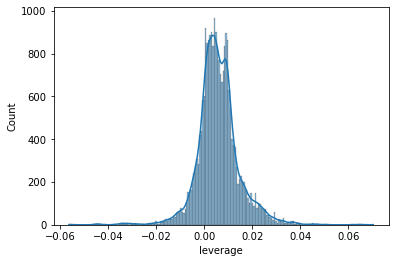

In [60]:
assoc_rules_chckn_bwl_fltr_one=assoc_rules_chckn_bwl[ \
    (assoc_rules_chckn_bwl.leverage >= \
    assoc_rules_chckn_bwl.leverage.describe()["75%"] + 3 * ( \
    assoc_rules_chckn_bwl.leverage.describe()["75%"] - \
    assoc_rules_chckn_bwl.leverage.describe()["25%"] \
    )) | \
    (assoc_rules_chckn_bwl.leverage <= \
    assoc_rules_chckn_bwl.leverage.describe()["25%"] - 3 * ( \
    assoc_rules_chckn_bwl.leverage.describe()["75%"] - \
    assoc_rules_chckn_bwl.leverage.describe()["25%"] \
    )) \
] # extracting maximal outliers (3*IQR instead of 1.5*IQR)

ax = sns.histplot(x=assoc_rules_chckn_bwl.leverage, kde=True)

In [61]:
assoc_rules_chckn_bwl_fltr_two = assoc_rules_chckn_bwl_fltr_one[
    (assoc_rules_chckn_bwl_fltr_one.confidence > \
    assoc_rules_chckn_bwl_fltr_one.confidence.quantile(q=0.95)) |
    (assoc_rules_chckn_bwl_fltr_one.confidence < \
    assoc_rules_chckn_bwl_fltr_one.confidence.quantile(q=0.05))
].sort_values(by=["leverage"], ascending=False)
display(assoc_rules_chckn_bwl_fltr_two)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(Sour Cream),"(Cheese, Rice)",0.588154,0.725895,0.497245,0.845433,1.164677,0.070307,1.773374
11,"(Sour Cream, Rice)",(Cheese),0.573003,0.756198,0.497245,0.867788,1.147567,0.063941,1.844027
8,(Sour Cream),(Cheese),0.588154,0.756198,0.506887,0.861827,1.139683,0.062126,1.764463
60,"(Sour Cream, Lettuce)","(Cheese, Rice)",0.377410,0.725895,0.323691,0.857664,1.181526,0.049731,1.925761
108,"(Sour Cream, Black Beans)","(Cheese, Rice)",0.320937,0.725895,0.279614,0.871245,1.200235,0.046648,2.128880
56,"(Sour Cream, Rice, Lettuce)",(Cheese),0.371901,0.756198,0.323691,0.870370,1.150982,0.042461,1.880756
91,"(Sour Cream, Black Beans)",(Cheese),0.320937,0.756198,0.285124,0.888412,1.174840,0.042432,2.184838
104,"(Sour Cream, Rice, Black Beans)",(Cheese),0.314050,0.756198,0.279614,0.890351,1.177404,0.042131,2.223471
49,"(Sour Cream, Lettuce)",(Cheese),0.377410,0.756198,0.325069,0.861314,1.139005,0.039672,1.757938
1081,"(Guacamole, Fajita Vegetables)",(Fresh Tomato Salsa),0.134986,0.446281,0.099174,0.734694,1.646259,0.038932,2.087095
